# **Cartpole**

In [2]:
from stable_baselines3 import PPO, DQN, A2C
import gymnasium as gym
from stable_baselines3.common.logger import configure
from stable_baselines3.common.evaluation import evaluate_policy
import pandas as pd
import matplotlib.pyplot as plt

## A2C 

In [ ]:
tmp_path = "./results/cartpole/A2C/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = A2C(policy = "MlpPolicy", env = env, device="cpu")

model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 15.7     |
|    ep_rew_mean        | 15.7     |
| time/                 |          |
|    fps                | 2852     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.692   |
|    explained_variance | 0.0382   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 1.84     |
|    value_loss         | 8.49     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 18.8     |
|    ep_rew_mean        | 18.8     |
| time/                 |          |
|    fps                | 3028     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/        

In [5]:
env = gym.make("CartPole-v1", render_mode='human')
(obs,_) = env.reset()
for i in range(1000):
    action, _state = model.predict(obs, deterministic=True)
    obs, reward, done, truncated, info = env.step(action)
    env.render()
    if done:
      obs = env.reset()

2025-03-26 15:24:07.973 Python[19843:925397] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-26 15:24:07.973 Python[19843:925397] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [4]:
model.save("./model/A2C_CartPole")

## Learning Curve Graph

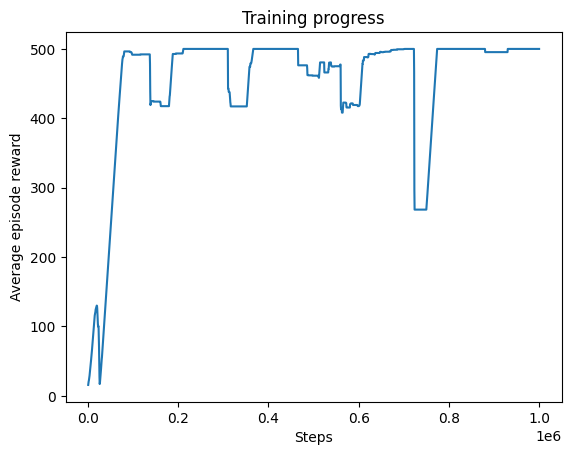

In [ ]:
df = pd.read_csv("results/cartpole/A2C/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Training progress')
plt.show()

## DDQN 

### Our Previous Hyperparameters

In [28]:
tmp_path = "./results/cartpole/DQN/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(
    policy = "MlpPolicy",
    env = env,
    device="cpu",
    learning_rate=0.001,
    buffer_size=10_000,
    batch_size=64,
    gamma=0.99,
    target_update_interval=100,
    exploration_fraction=1.5e-3, # explicar de onde veio, aqui é linear, no nosso era expo
    exploration_initial_eps=1.0,
    exploration_final_eps=0.01   
)

            
model.set_logger(new_logger)
model.learn(total_timesteps=300_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN/
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 25.2     |
|    ep_rew_mean      | 25.2     |
|    exploration_rate | 0.778    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 3582     |
|    time_elapsed     | 0        |
|    total_timesteps  | 101      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 21.1     |
|    ep_rew_mean      | 21.1     |
|    exploration_rate | 0.628    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 3197     |
|    time_elapsed     | 0        |
|    total_timesteps  | 169      |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.284    |
|    n_updates        | 17       |
----------------------------------
----------------------------------
| rollout/          

### Tuned Hyperparameters from: https://github.com/DLR-RM/rl-baselines3-zoo/blob/master/hyperparams/dqn.yml

In [26]:
tmp_path = "./results/cartpole/DQN/"
new_logger = configure(tmp_path, ["stdout", "csv"])

env = gym.make("CartPole-v1")
model = DQN(policy="MlpPolicy",
    env=env,
    device="cpu",
    learning_rate=2.3e-3,
    batch_size=64,
    buffer_size=100_000,
    learning_starts=1000,
    gamma=0.99,
    target_update_interval=10,
    train_freq=256,
    gradient_steps=128,
    exploration_fraction=0.16,
    exploration_final_eps=0.04,
    policy_kwargs=dict(net_arch=[256, 256]),
)
            
model.set_logger(new_logger)
model.learn(total_timesteps=100_000)

mean_reward, std_reward = evaluate_policy(model, model.get_env(), n_eval_episodes=10)
print(f'Mean reward: {mean_reward} +/- {std_reward:.2f}')

print('modelo treinado')

Logging to ./results/cartpole/DQN/
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24       |
|    ep_rew_mean      | 24       |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 9831     |
|    time_elapsed     | 0        |
|    total_timesteps  | 96       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 22.1     |
|    ep_rew_mean      | 22.1     |
|    exploration_rate | 0.989    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 10436    |
|    time_elapsed     | 0        |
|    total_timesteps  | 177      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 24.2     |
|    ep_rew_mean      | 24.2     |
|    exploration_rate | 0.983    |
| time/             

In [ ]:
model.save("./model/DQN_CartPole")

## Learning Curve Graphs

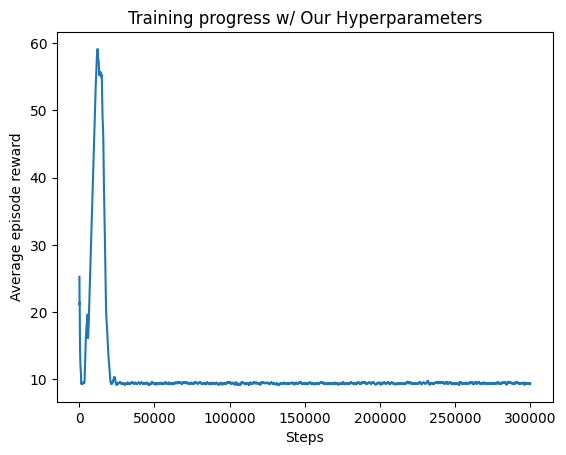

In [30]:
df = pd.read_csv("results/cartpole/DQN/progress.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Training progress w/ Our Hyperparameters')
plt.show()

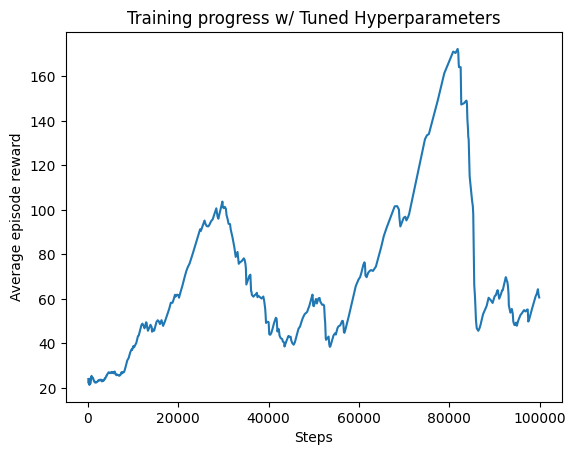

In [31]:
df = pd.read_csv("results/cartpole/DQN/progress_tuned_hyper.csv")

df.head()

plt.plot(df['time/total_timesteps'], df['rollout/ep_rew_mean'])
plt.xlabel('Steps')
plt.ylabel('Average episode reward')
plt.title('Training progress w/ Tuned Hyperparameters')
plt.show()